In [118]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import requests
from datetime import date, datetime, timedelta
from io import StringIO

from lib.physics import *
from lib.spa import SPA

from numpy.random import rand, seed

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

font = {'size'   : 12}

matplotlib.rc('font', **font)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
# Setup dataframes
seed(1)
xLat = rand(100)*360. - 180.
xLon = rand(100)*180. - 90.
t = pd.to_datetime(datetime(2017, 1, 1))
td = pd.to_timedelta(rand(100)*365, unit = 'd').to_pytimedelta()
xDatetime = pd.Series(t+td)
df = pd.DataFrame({'time': xDatetime, 'lat': xLat, 'lon': xLon})
df['tod'] = df.time - df.time.dt.normalize()
df.index = df.time

# Calculate solar position
psi1 = solar_psi_(df.time.dt, df.lat, df.lon)
alpha1 = solar_alpha_(df.time.dt, df.lat, df.lon)
psi2, alpha2 = SPA(df.time, df.lat, df.lon)

Text(0,0.5,u'SAA, error (Degrees)')

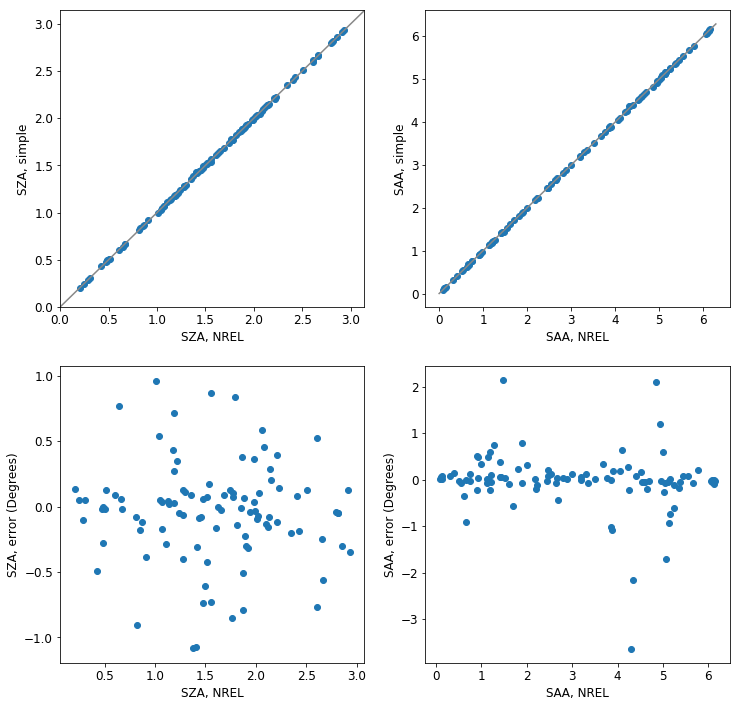

In [149]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
line1 = axes[0,0].plot([0, pi], [0, pi], c='#888888')
line2 = axes[0,0].scatter(psi2, psi1)
axes[0,0].set_xlabel('SZA, NREL')
axes[0,0].set_ylabel('SZA, simple')
axes[0,0].set_xlim((0, pi))
axes[0,0].set_ylim((0, pi))

line2 = axes[1,0].scatter(psi2, (psi2-psi1)*180./pi)
#line2 = axes[1,0].scatter(psi2, (psi2-psi1)/psi2)
axes[1,0].set_xlabel('SZA, NREL')
axes[1,0].set_ylabel('SZA, error (Degrees)')

line1 = axes[0,1].plot([0, 2*pi], [0, 2*pi], c='#888888')
line2 = axes[0,1].scatter(alpha2, alpha1)
axes[0,1].set_xlabel('SAA, NREL')
axes[0,1].set_ylabel('SAA, simple')

line2 = axes[1,1].scatter(alpha2, (alpha2-alpha1)*180./pi)
#line2 = axes[1,1].scatter(alpha2, (alpha2-alpha1)/alpha2)
axes[1,1].set_xlabel('SAA, NREL')
axes[1,1].set_ylabel('SAA, error (Degrees)')
